In [11]:
import json
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from arguments import prepare_finetuning_args, Args
args = prepare_finetuning_args()

# Leggere il file di log
#log_file_path = './output/log_sup.txt'
#log_file_path = './output/log_pretrainTrue.txt'
log_file_path = './output/log_12h.txt'
log_file_path = './output/log_12h_cloudy.txt'
log_file_path = './output/log_CL10.txt'
log_file_path = './output/log_CL10_2596.txt'
log_file_path = './output/log_CL10_2.txt'


In [12]:
train_epochs = []
train_losses = []

test_epochs = []
test_losses = []

val_epochs = []
val_losses = []

val_accs = []

with open(log_file_path, 'r', encoding="utf-8") as file:
    val_epoch = None
    
    for line in file:
        data = json.loads(line)
        epoch = data["epoch"] + 1
        
        if "train_loss" in data:
            train_loss = data["train_loss"]        
            if epoch not in train_epochs:
                train_epochs.append(epoch)
                train_losses.append(train_loss)

        if "test_loss" in data:
            test_loss = data["test_loss"]
            if epoch not in test_epochs:
                test_epochs.append(epoch)
                test_losses.append(test_loss)        
            
        
        # Controlliamo se c'è una validation loss e accuracy
        if "val_loss" in data:
            #print(line)
            val_epoch = epoch
            val_losses.append(data["val_loss"])
            val_epochs.append(val_epoch)

            if "val_acc1" in data:       
                val_accs.append(data["val_acc1"])
            
        
        # Ogni 10 epoche, salviamo la media della validation loss e accuracy
        #if val_epoch is not None and val_epoch % args.VAL_FREQ == 0:
            #avg_val_loss = sum(val_loss_accumulator) / len(val_loss_accumulator)
            #avg_val_acc = sum(val_acc_accumulator) / len(val_acc_accumulator)
            #val_epochs.append(val_epoch)
            #val_losses.append(avg_val_loss)
            #val_accs.append(avg_val_acc)
            #val_loss_accumulator = []  # Reset dell'accumulatore
            #val_acc_accumulator = []
            #val_epoch = None


Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

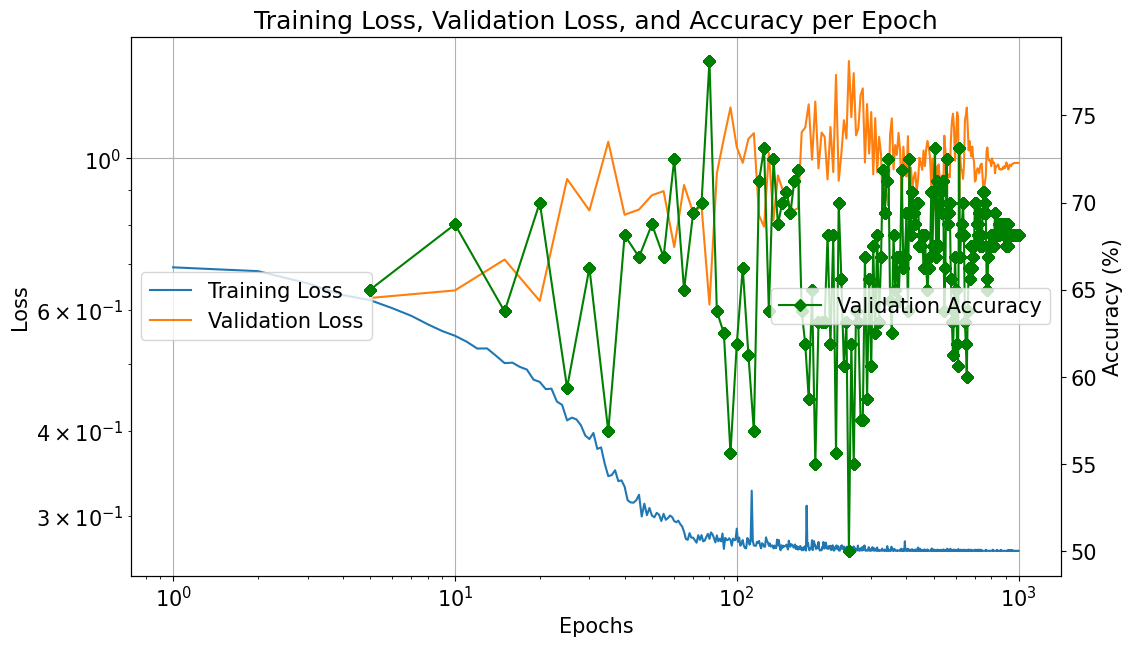

In [15]:
# Plot del grafico
fig, ax1 = plt.subplots(figsize=(12, 7))

# Asse sinistro per la loss
ax1.plot(train_epochs, train_losses, label='Training Loss') #, marker='o', linestyle='')
#ax1.plot(test_epochs, test_losses, label='Test Loss') #color='r', marker='s', 
ax1.plot(val_epochs, val_losses, label='Validation Loss') #color='r', marker='s', 
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend(loc='center left')
ax1.set_yscale('log')
ax1.set_xscale('log')

if len(val_accs)>0:
    # Asse destro per l'accuracy
    ax2 = ax1.twinx()
    ax2.plot(val_epochs, val_accs, color='g', marker='D', label='Validation Accuracy')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend(loc='center right')

plt.title('Training Loss, Validation Loss, and Accuracy per Epoch')
#plt.show()
#plt.savefig("CL10_2.png")

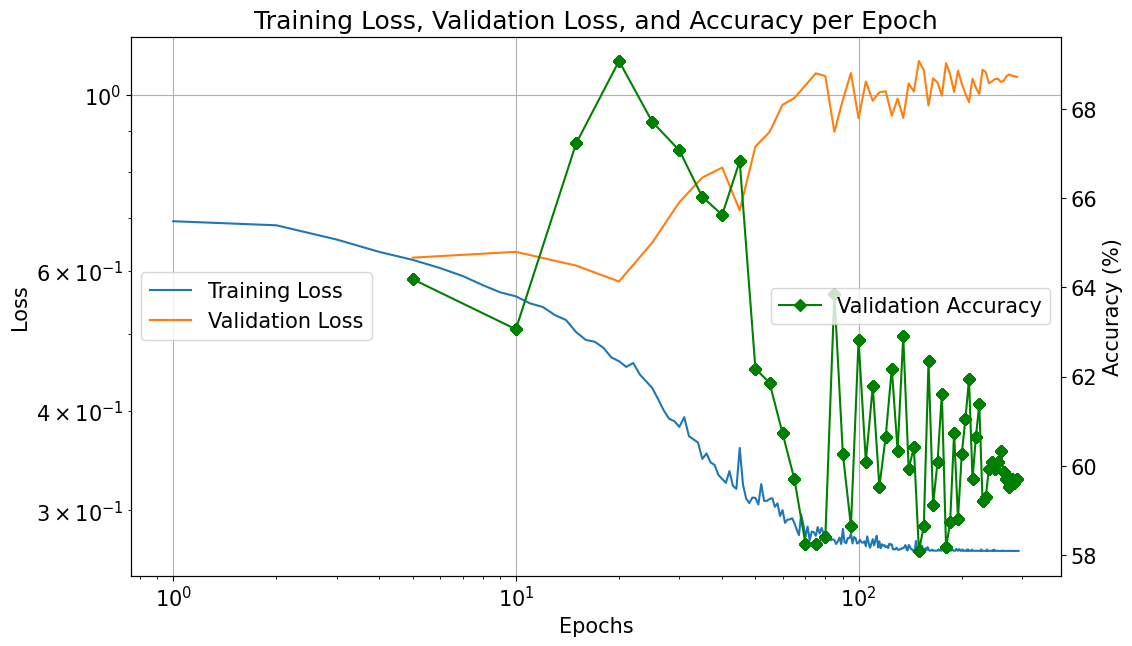

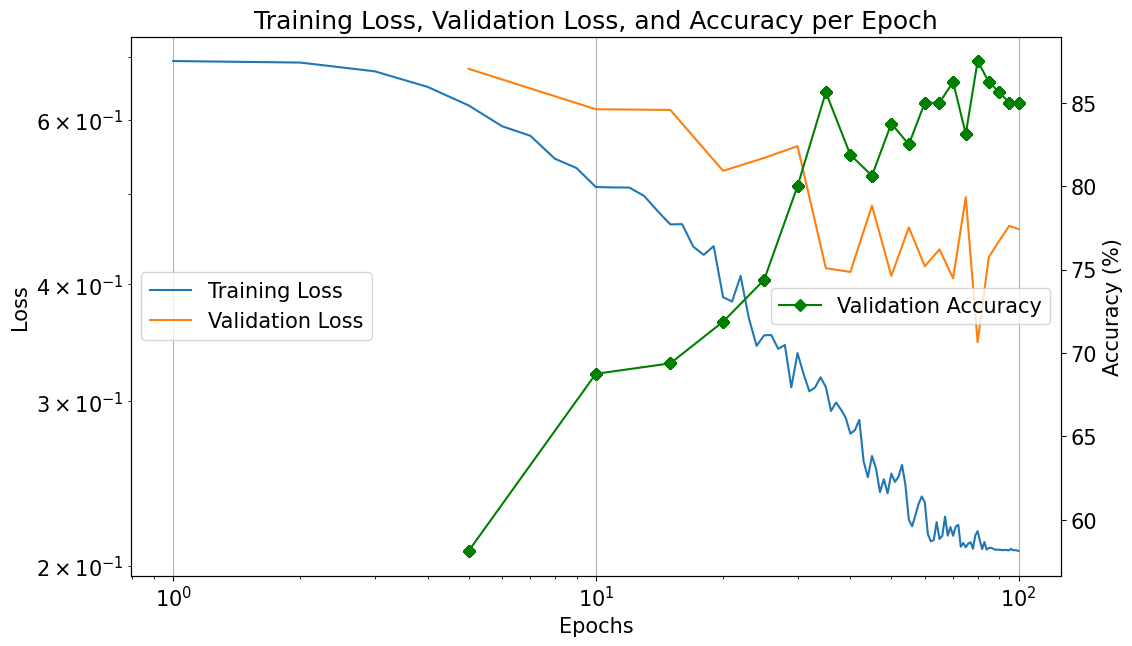

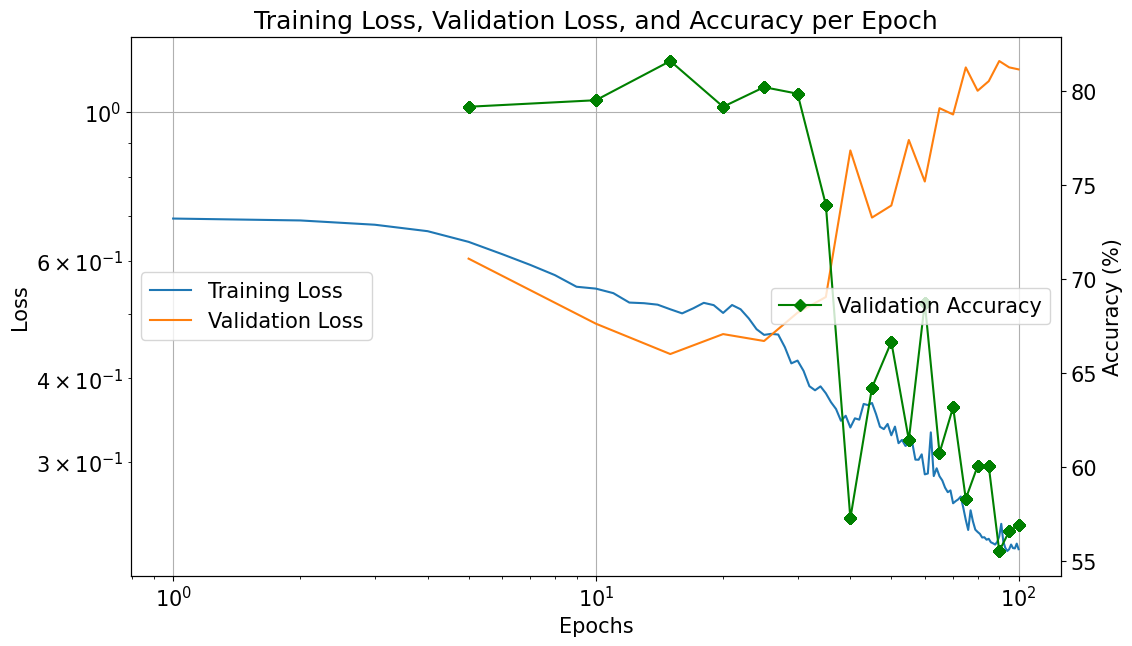

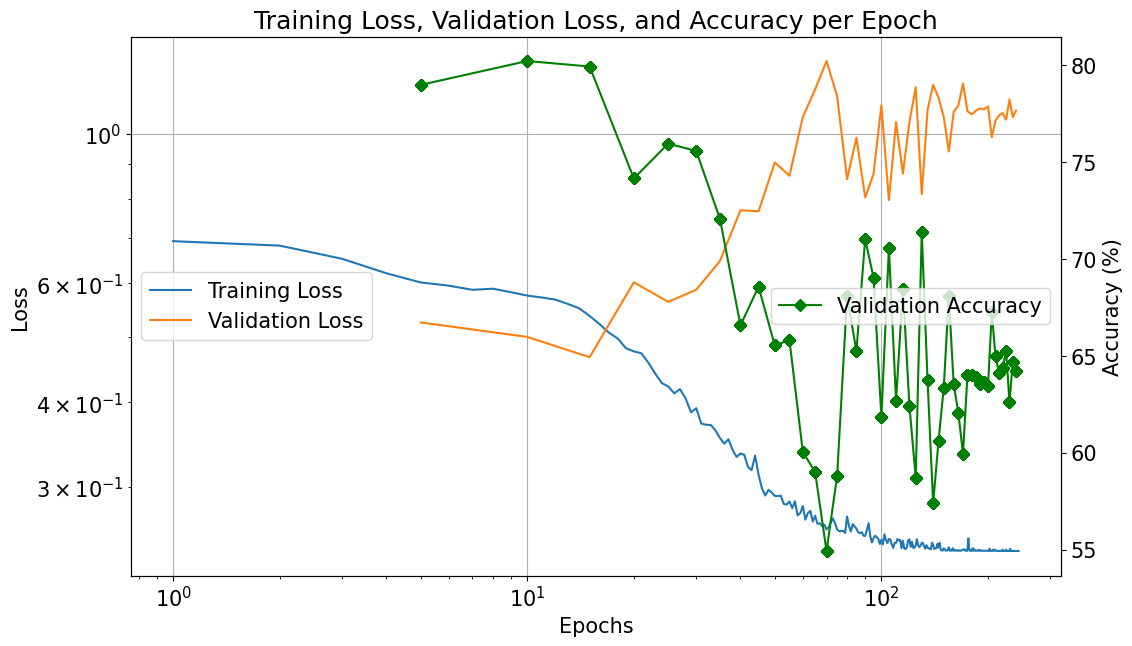

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

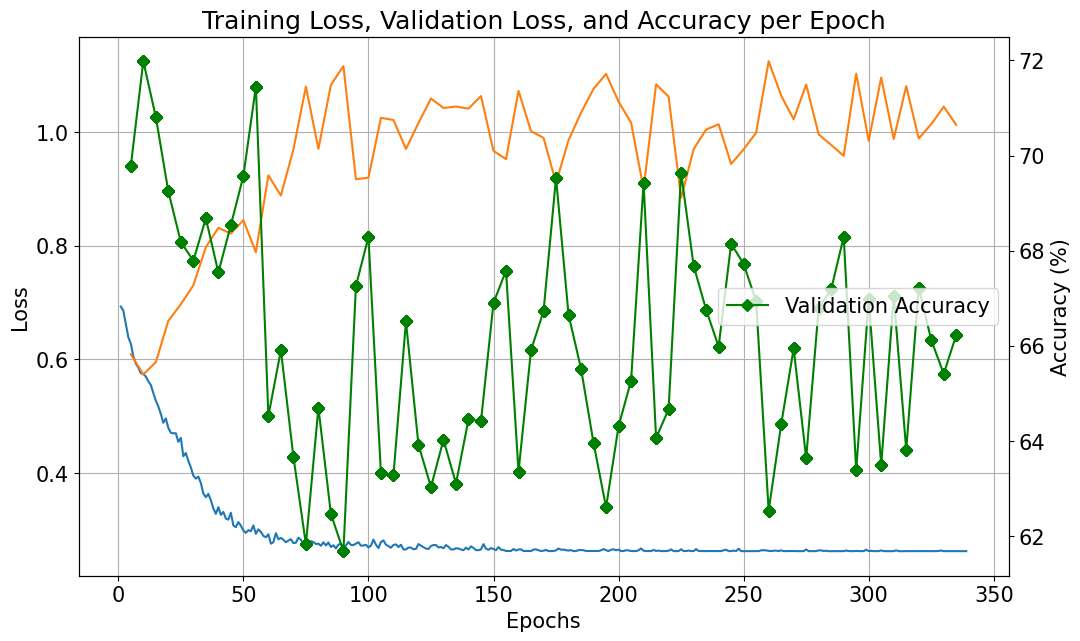

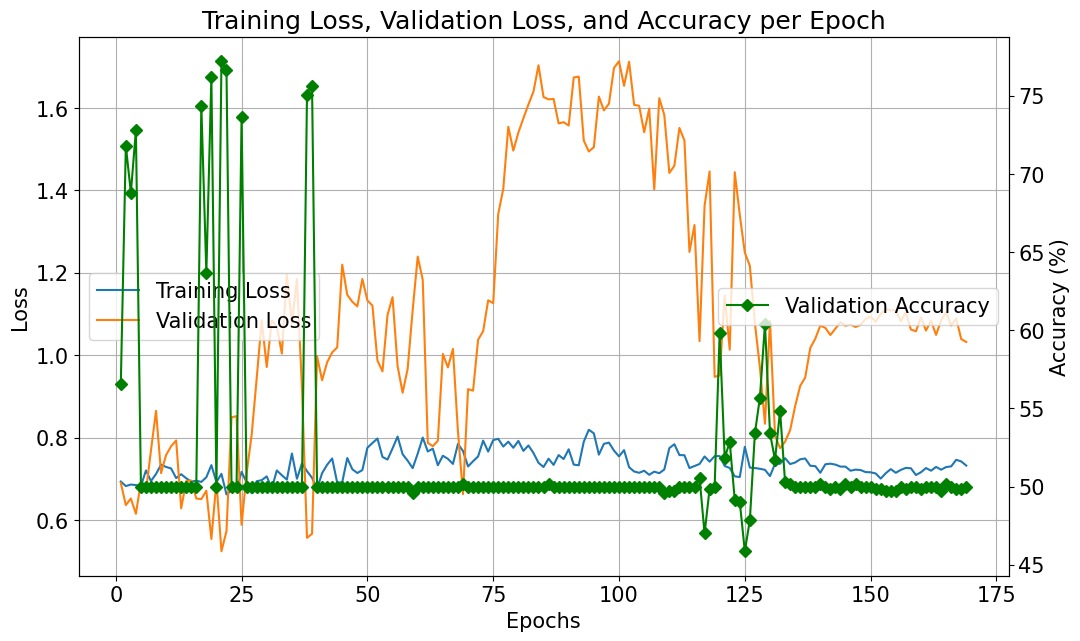

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

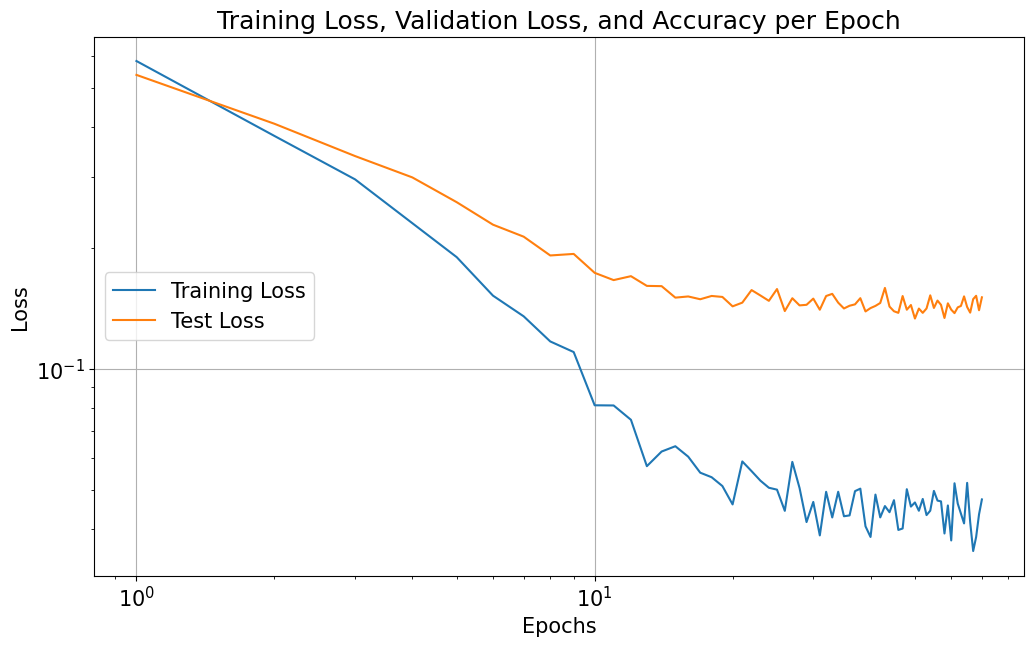

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

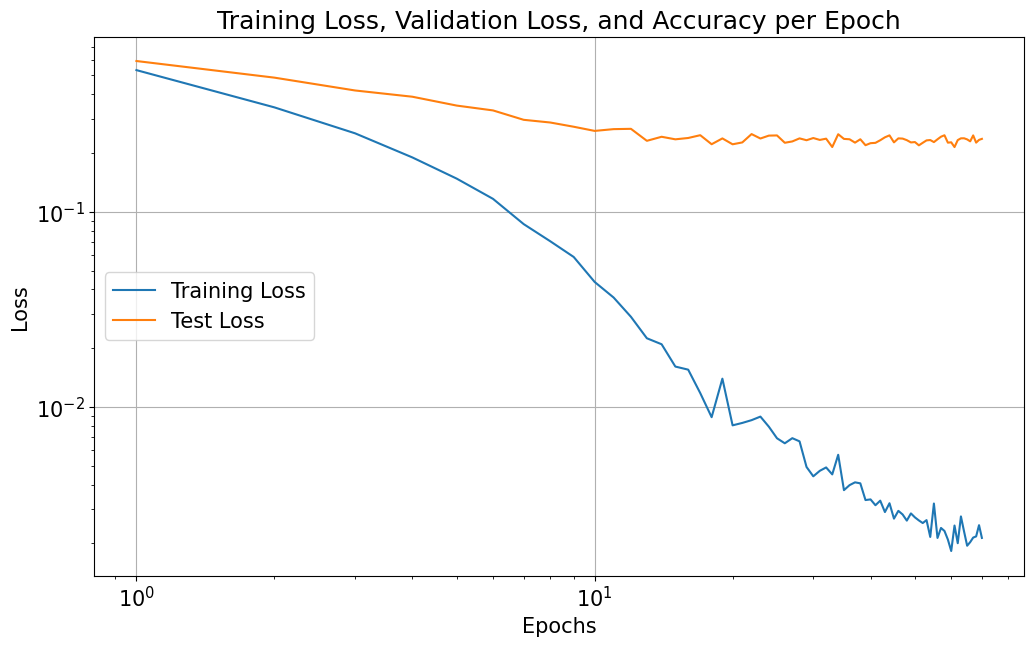

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

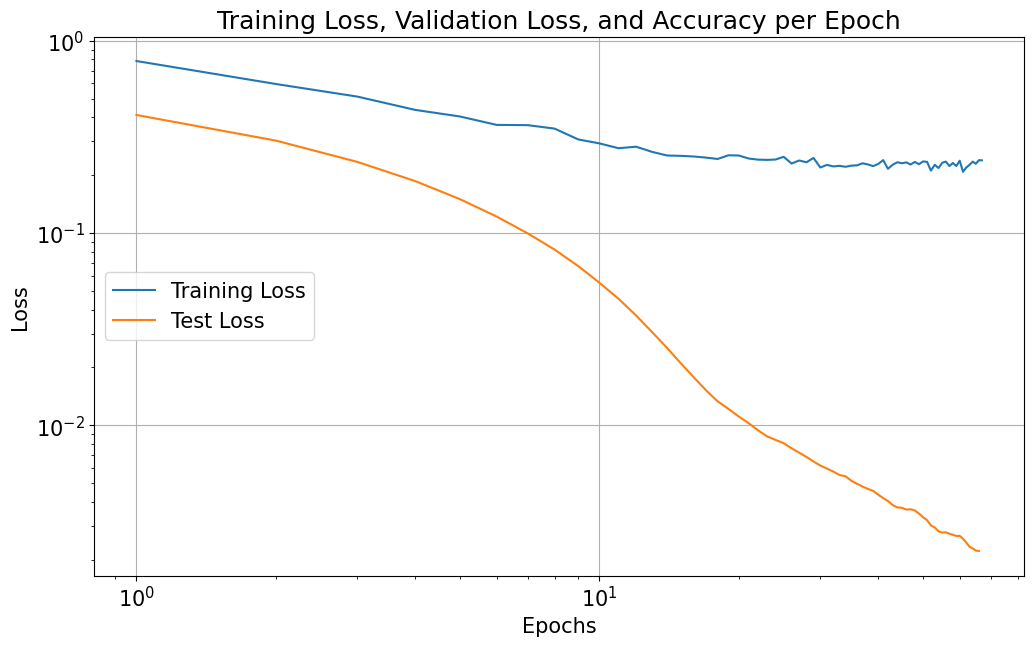

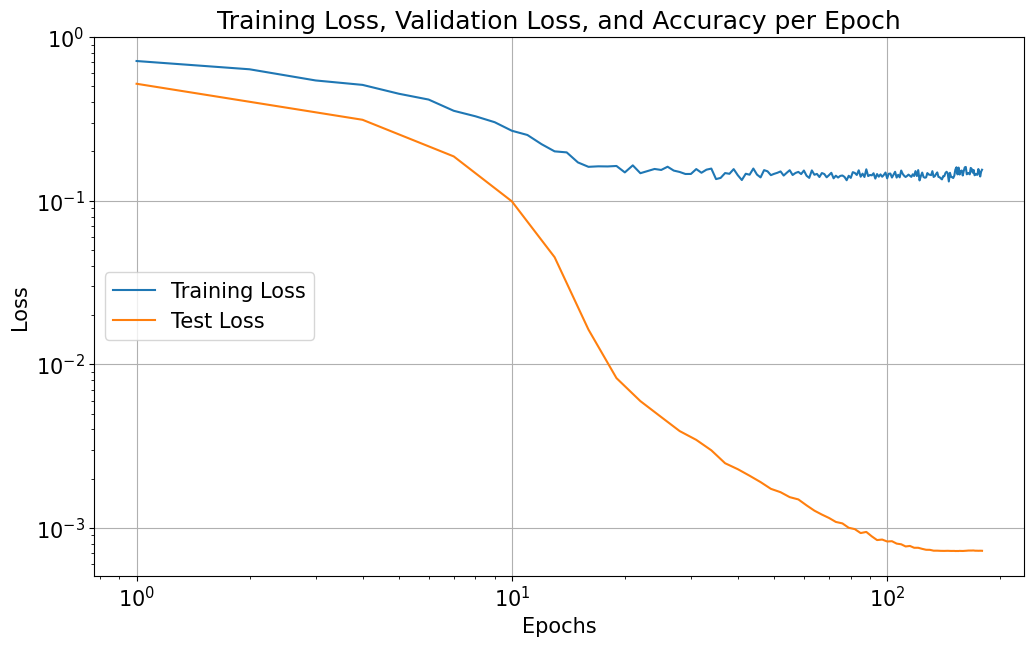

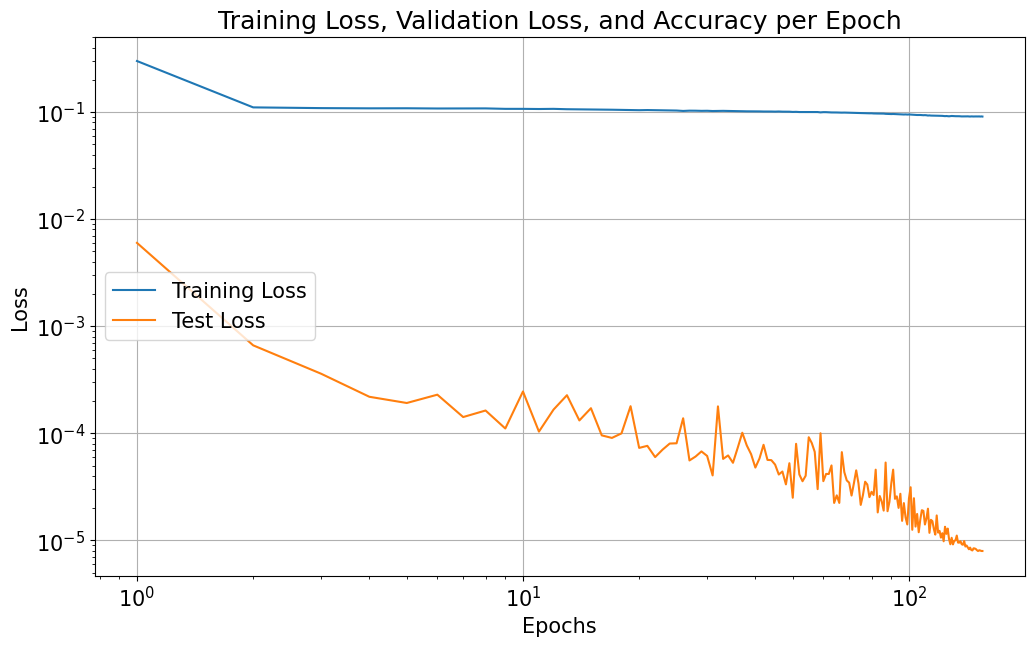

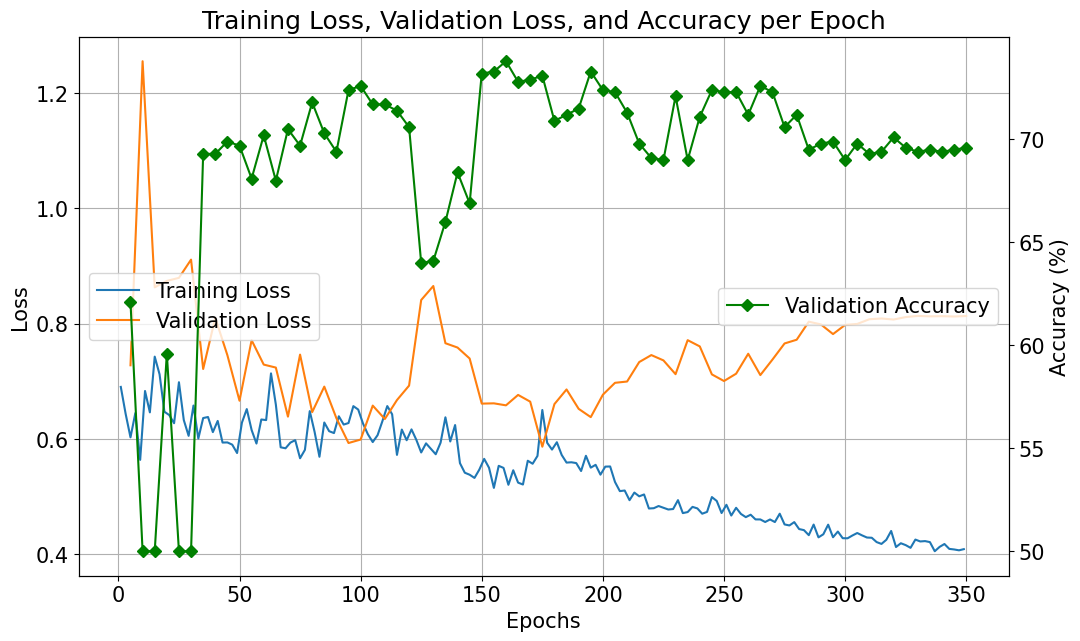

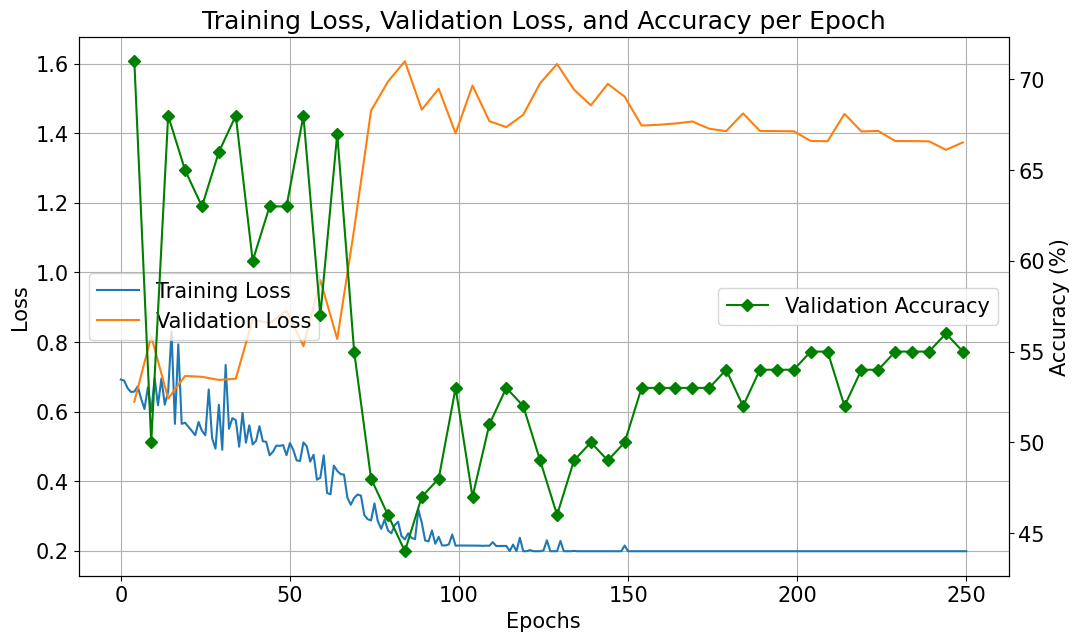

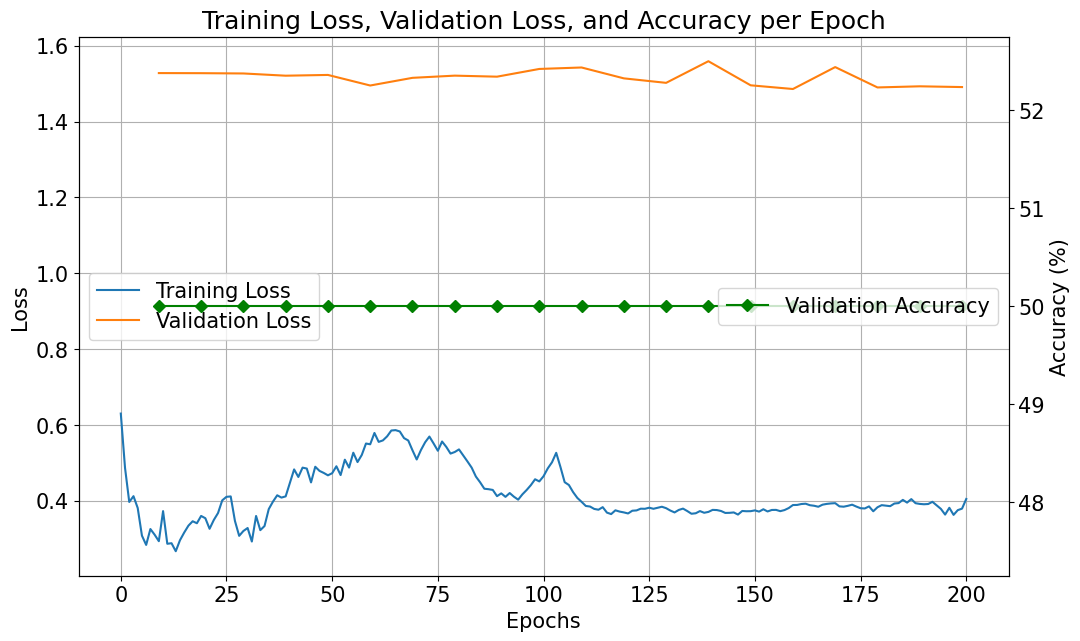

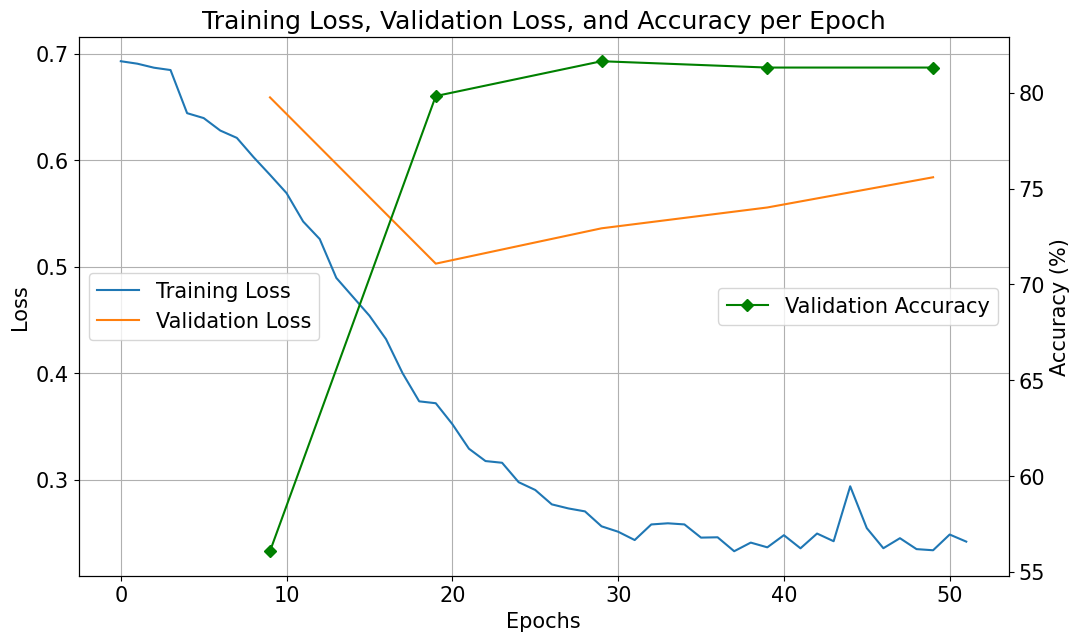

# Verifica training